In [1]:
import pandas as pd
import os, sys

## AF Feats

In [2]:
fname = '/scratch/elec/puhe/c/muse_2023/c3_muse_personalisation/feature_segments/w2v-msp/10.csv'
df = pd.read_csv(fname)
df.shape

(588, 1026)

## Physio-Arousal, Valence

<Axes: title={'center': 'physio-arousal'}>

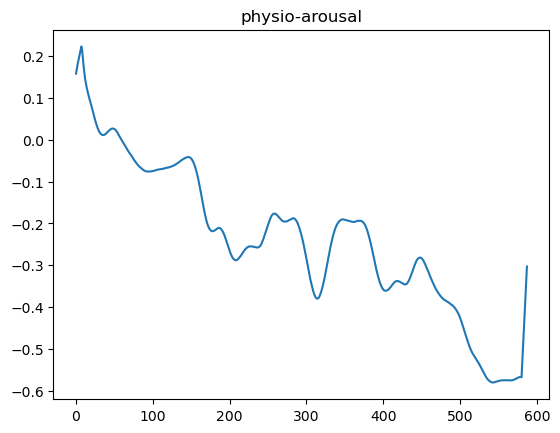

In [26]:
affect='physio-arousal' # 'valence'
fname = f'/scratch/elec/puhe/c/muse_2023/c3_muse_personalisation/label_segments/{affect}/10.csv'
df = pd.read_csv(fname)
df.shape
df.head(3)
df['value'].plot(title=affect)

## Biosignals

<Axes: title={'center': 'resp'}>

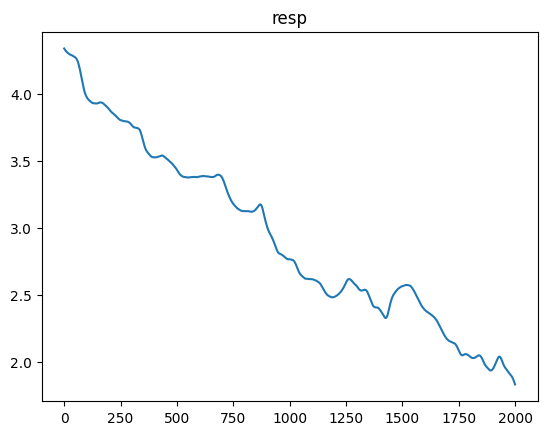

In [6]:
bio='resp'
fname = f'/scratch/elec/puhe/c/muse_2023/c3_muse_personalisation/feature_segments/{bio}_raw/10.csv'
df = pd.read_csv(fname)
df[bio][:2000,].plot(title=bio)

<Axes: title={'center': 'resp'}>

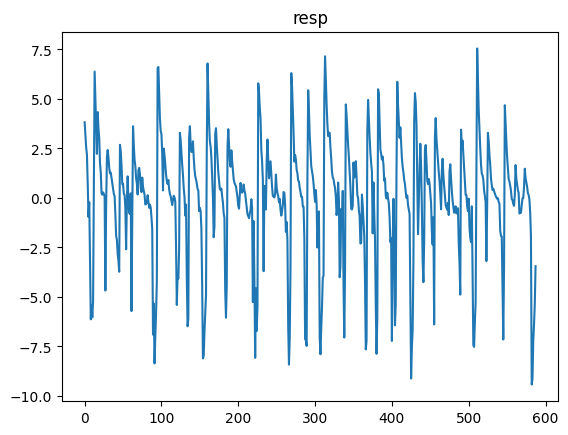

In [10]:
bio='resp'
fname = f'/scratch/elec/puhe/c/muse_2023/c3_muse_personalisation/feature_segments/{bio}/10.csv'
df = pd.read_csv(fname)
df[bio][:2000,].plot(title=bio)

<Axes: title={'center': 'resp'}>

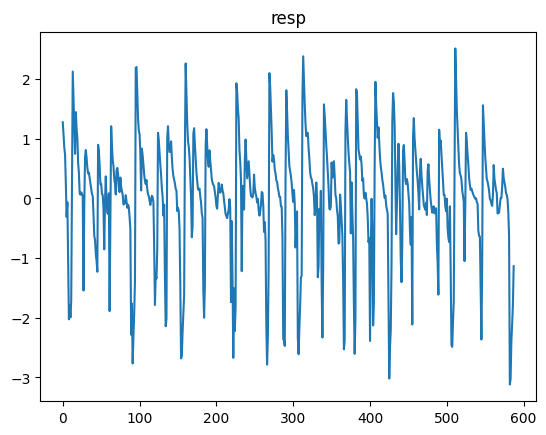

In [13]:
bio='resp'
fname = f'/scratch/elec/puhe/c/muse_2023/c3_muse_personalisation/label_segments/{bio}_normalized/10.csv'
df = pd.read_csv(fname)
df['value'][:2000,].plot(title=bio)

## Correlation Analysis

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [27]:
biosignals=['BPM_normalized', 'ECG_normalized', 'resp_normalized', 'physio-arousal', 'valence']
spkr='1'
df=pd.DataFrame()
frames=[]
for bio in biosignals:
    fname = f'/scratch/elec/puhe/c/muse_2023/c3_muse_personalisation/label_segments/{bio}/{spkr}.csv'
    _df = pd.read_csv(fname, index_col=0)
    _df[bio]=_df['value']
    frames.append(_df[bio])
df = pd.concat(frames, axis=1, join='inner')
df.shape

(598, 5)

In [28]:
df.head(3)

,BPM_normalized,ECG_normalized,resp_normalized,physio-arousal,valence
timestamp,,,,,
500,-2.132363,-0.857590,-0.075328,0.0370,0.0539
1000,-2.295753,0.465855,-0.005781,0.0523,0.0619
1500,-2.054316,-0.939652,0.554107,0.0703,0.0716


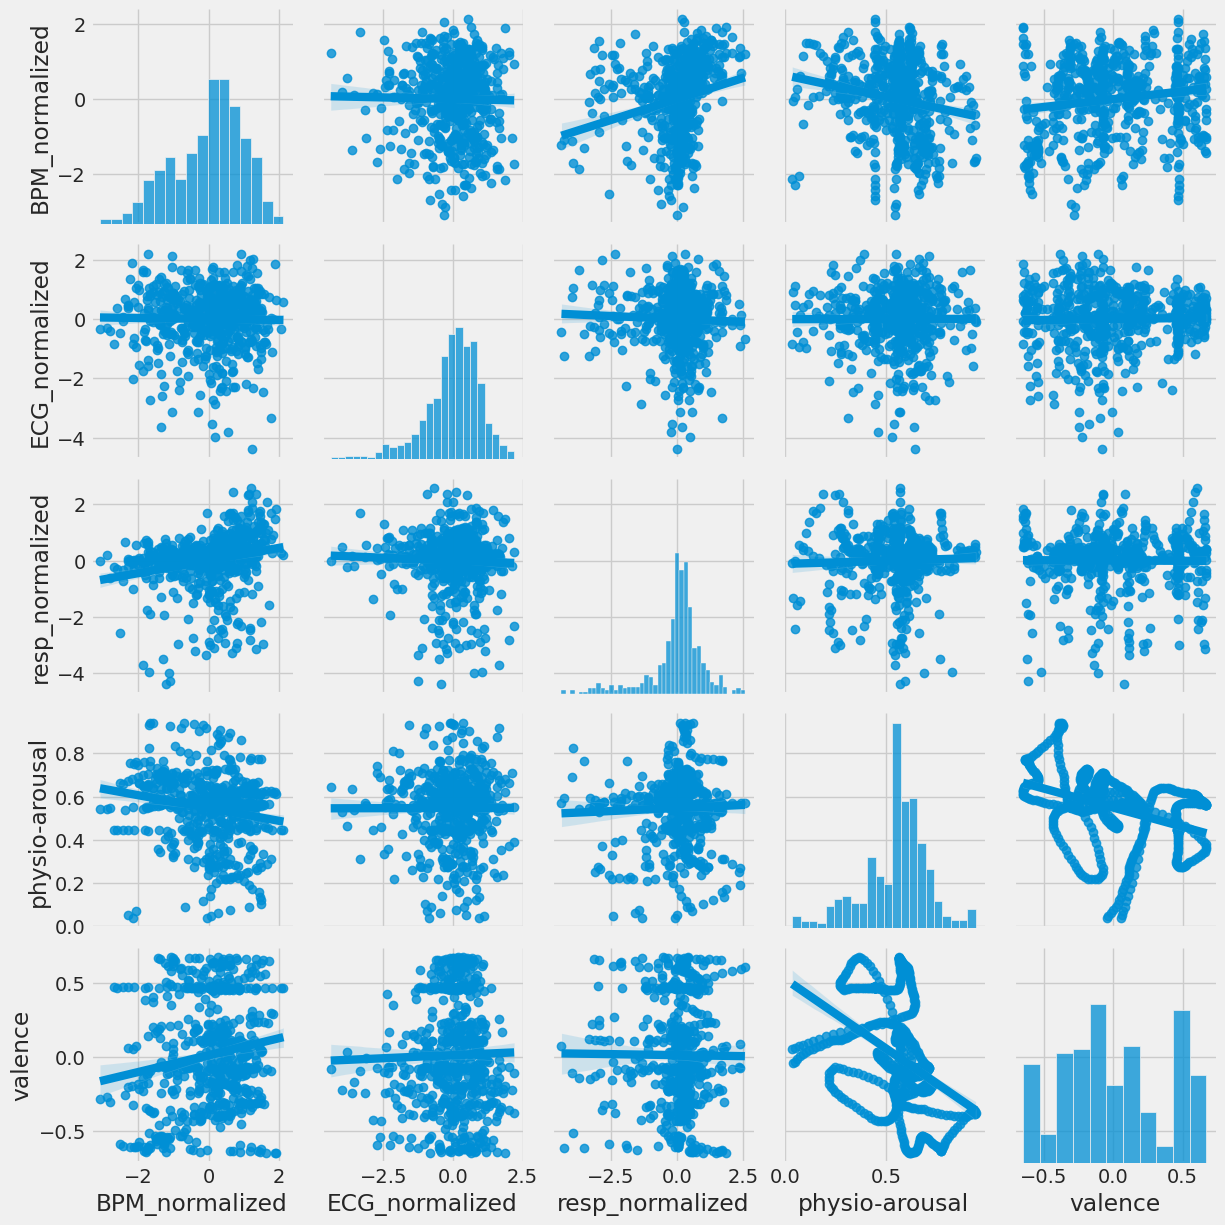

In [29]:
sns.pairplot(df, kind='reg')

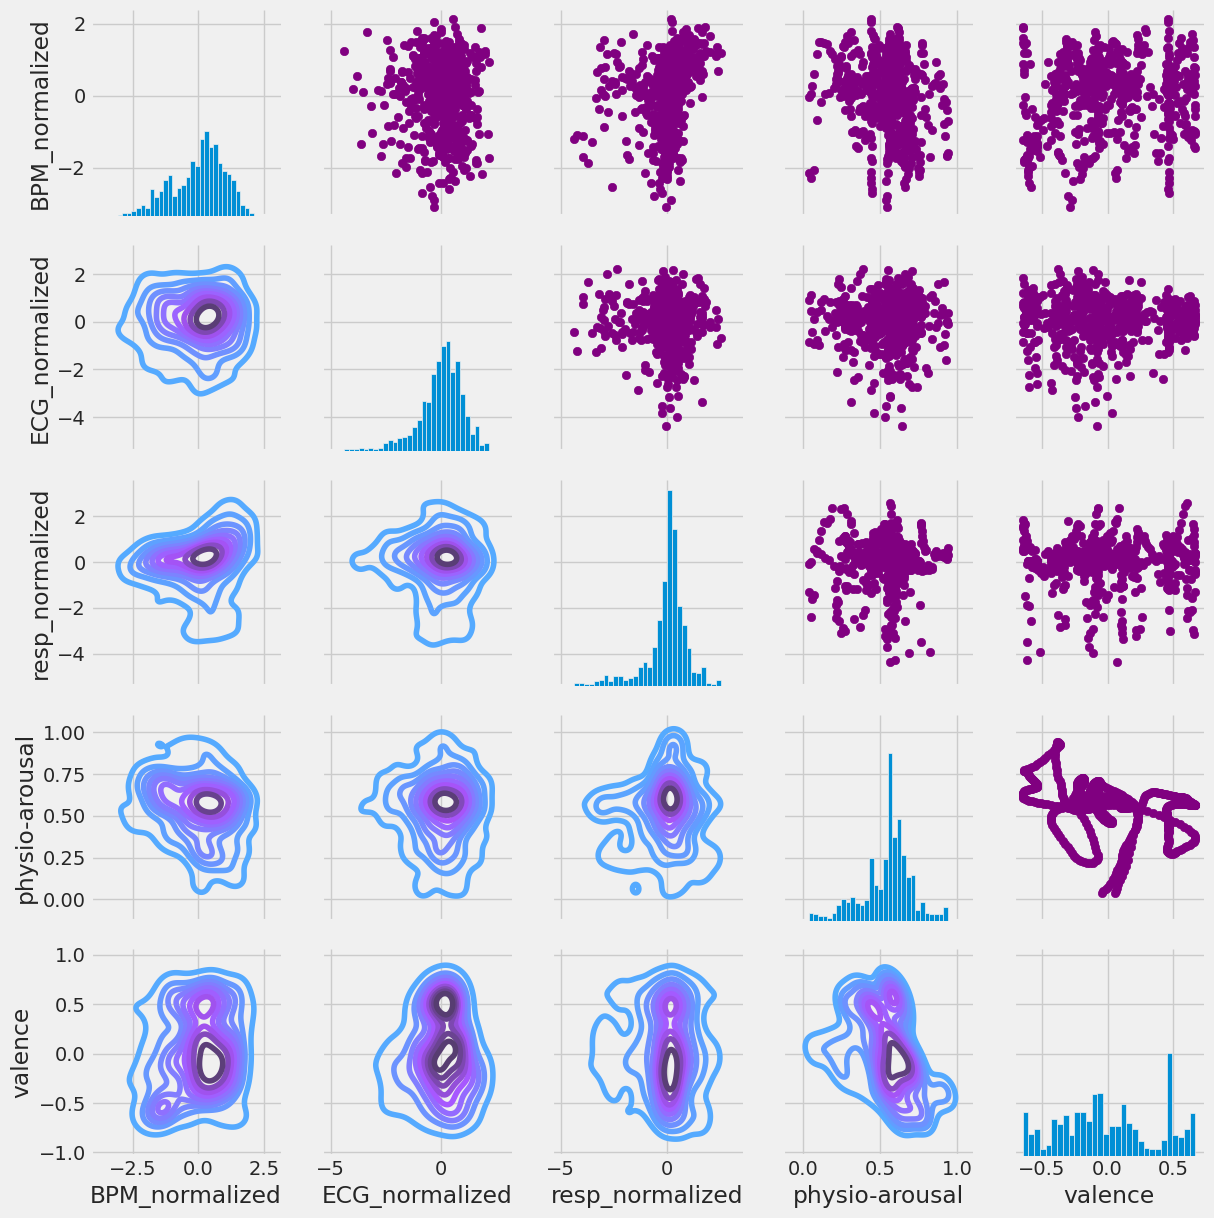

In [30]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots 
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of signals')

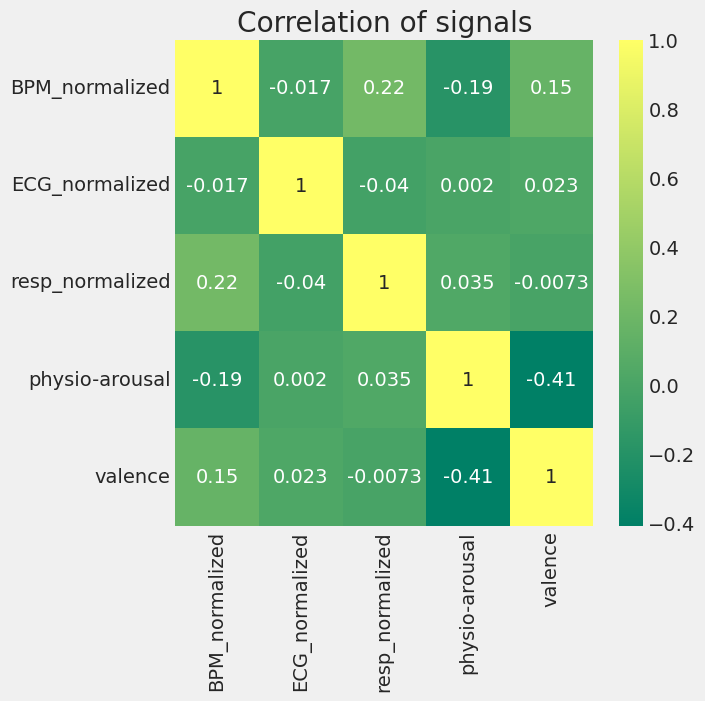

In [33]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, cmap='summer')
plt.title('Correlation of signals')